In [76]:
#importing necessary modules 
import pandas as pd
import numpy as np 

#visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#distance calculator libraries
import haversine as hs
from haversine import Unit

from sklearn.cluster import KMeans

In [49]:
#reading the data 
trip_data = pd.read_csv(r'C:\Users\Aman Gupta\test\nyc_taxi_trip_duration_predictor\data\raw\train.csv')

In [50]:
#checking null values in data 
trip_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [51]:
#checking for duplicated rows in data 
trip_data.duplicated().sum()

0

In [52]:
#checking descriptivie stats of data 
trip_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [32]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


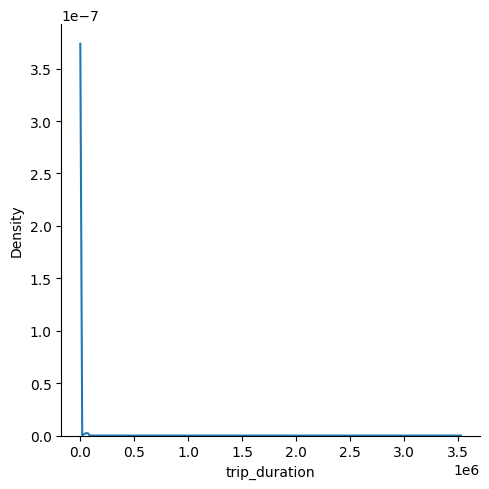

In [53]:
#checking distribution of trip duration 
sns.displot(trip_data, x = 'trip_duration', kind = 'kde')

<Axes: xlabel='trip_duration'>

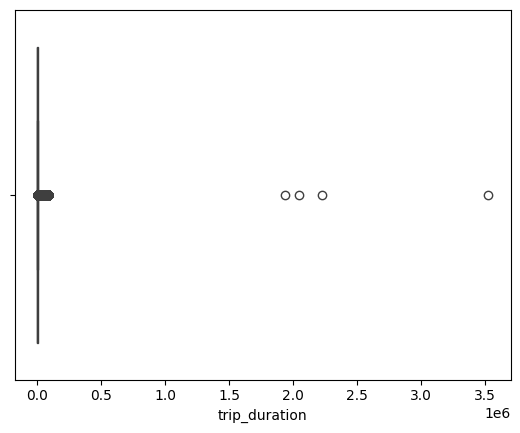

In [54]:
#box plot to understand the trip duration distribution 
sns.boxplot(trip_data, x = 'trip_duration')

In [55]:
#checking for trips that has a duration higher than 30000 seconds
trip_data[trip_data.trip_duration > 30000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,86236
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,N,85197
...,...,...,...,...,...,...,...,...,...,...,...
1455097,id2798196,2,2016-03-20 03:51:36,2016-03-21 00:00:00,2,-73.969299,40.757301,-73.870277,40.709808,N,72504
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,86233
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,85311
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,86314


Looks like there are very few rows somewhere around 0.2-0.3% of whole data where trip duration is grater than 30,000 and also its very unlikely to have 30,000 plus second of cab ride. So I will consider them as an outliers and will remove them from data

In [56]:
#removiong all rows with trip duration equal to or greater than 30000 seconds
trip_data = trip_data[trip_data.trip_duration <30000]

<Axes: xlabel='trip_duration'>

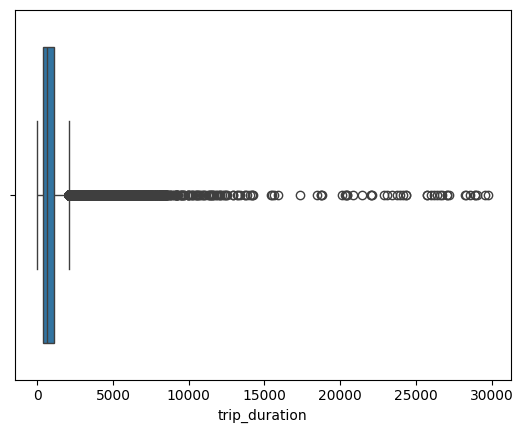

In [57]:
#box plot to understand the trip duration distribution 
sns.boxplot(trip_data, x = 'trip_duration')

In [58]:
#removing trips with duration less than a minute as it doesn't makes much sense to have a minute trip only
trip_data = trip_data[trip_data.trip_duration > 60]

In [59]:
#converting pick up date and drop off date into datetime object 
trip_data['pickup_datetime'] = pd.to_datetime(trip_data['pickup_datetime'])
trip_data['dropoff_datetime'] = pd.to_datetime(trip_data['dropoff_datetime'])

In [66]:
#extracting year, month, day , week of day from datetime 
trip_data['pickup_month'] = trip_data['pickup_datetime'].dt.month
trip_data['pickup_day'] = trip_data['pickup_datetime'].dt.day
trip_data['pickup_weekday'] = trip_data['pickup_datetime'].dt.dayofweek
trip_data['pickup_hour'] = trip_data['pickup_datetime'].dt.hour
trip_data['trip_duration_mins'] = (trip_data['trip_duration']/60).round(2)
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
trip_data['pickup_weekday'] = trip_data['pickup_weekday'].map(lambda x:weekday[x])


Effect of Weekday on trip duration and number of trips in a day

<Axes: xlabel='pickup_weekday', ylabel='count'>

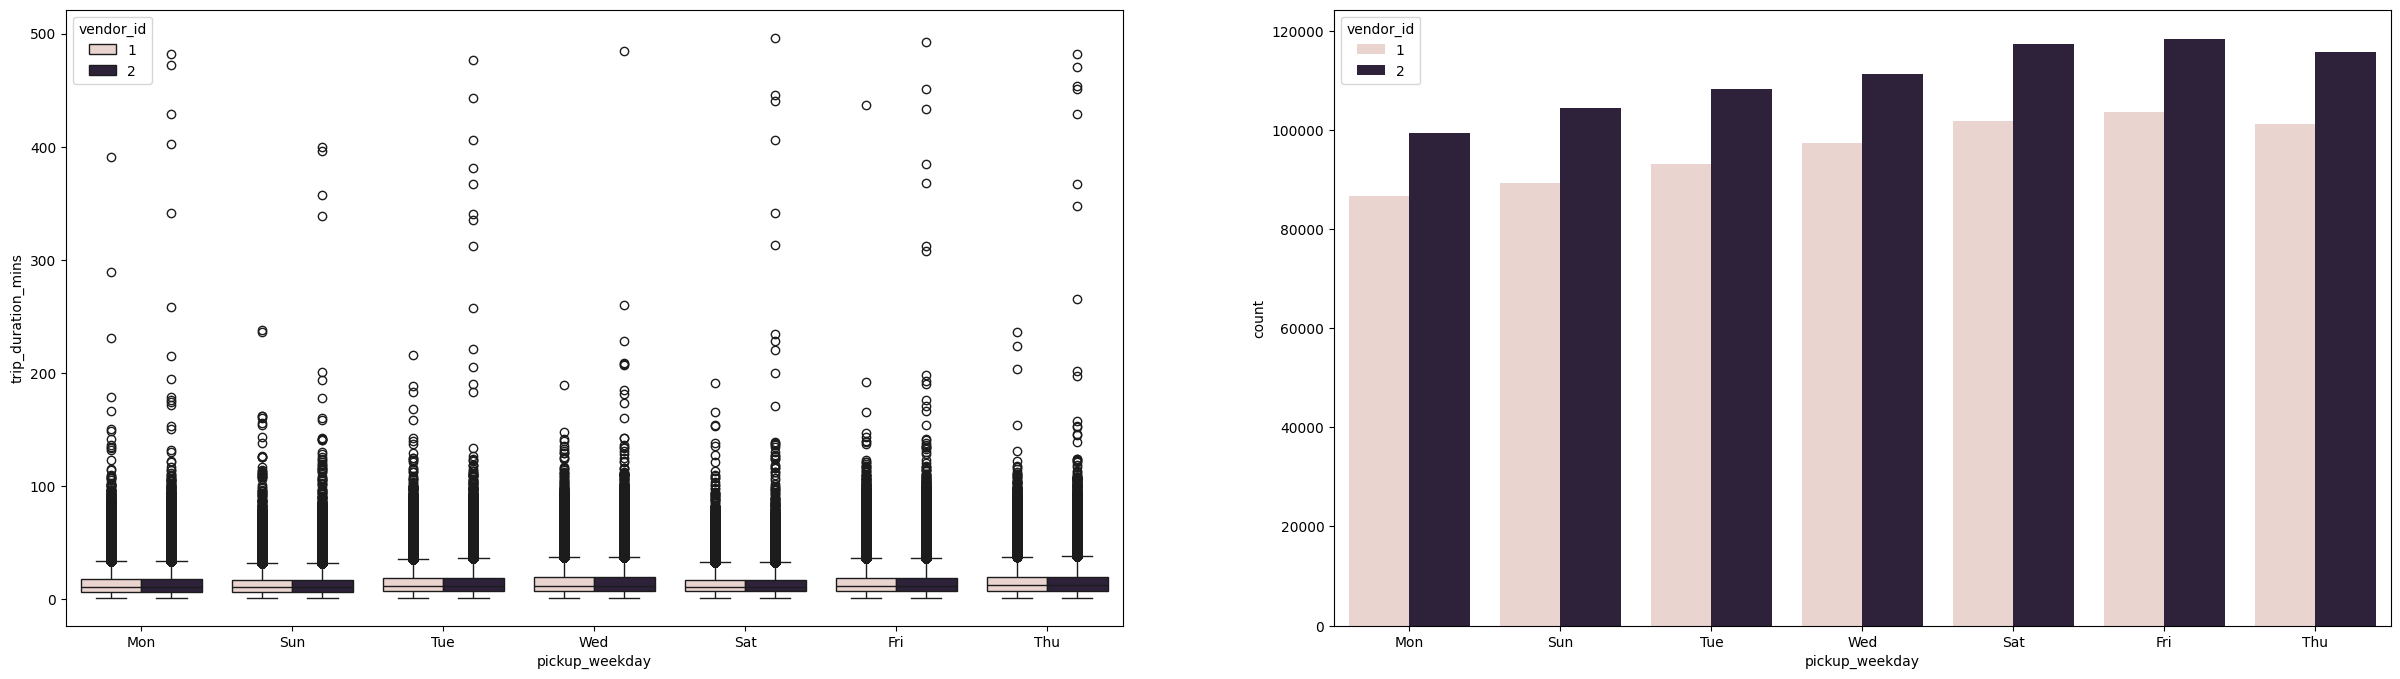

In [61]:
#plot to get the count of rides on each weekday by each vendor and their trip duration
fig, axs = plt.subplots(1,2, figsize=(30,8))
sns.boxplot(trip_data, x = 'pickup_weekday',  y = 'trip_duration_mins',hue = 'vendor_id', ax=axs[0])
sns.countplot(trip_data, x = 'pickup_weekday', hue = 'vendor_id',ax = axs[1])

<Axes: xlabel='pickup_weekday', ylabel='count'>

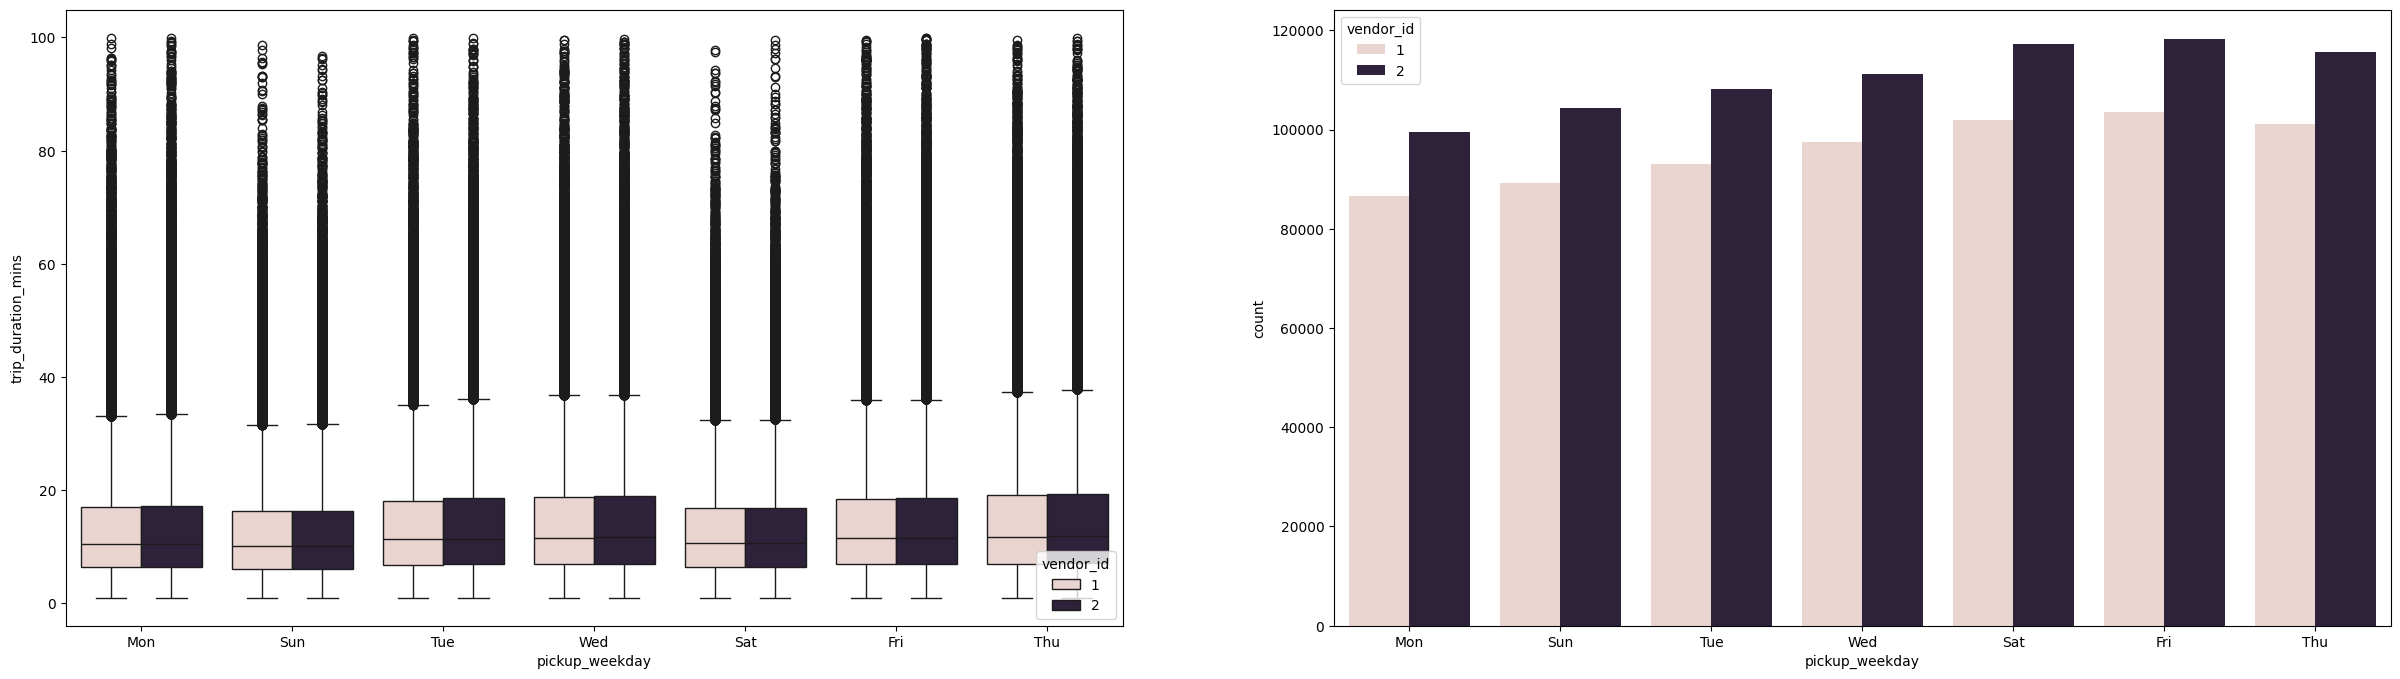

In [62]:
#removing all the trip duration with more than 100 minutes to get a better picture of effect of weekdays
fig, axs = plt.subplots(1,2, figsize=(30,8))
sns.boxplot(trip_data[trip_data.trip_duration_mins<=100], x = 'pickup_weekday',  y = 'trip_duration_mins',hue = 'vendor_id', ax=axs[0])
sns.countplot(trip_data[trip_data.trip_duration_mins<=100], x = 'pickup_weekday', hue = 'vendor_id',ax = axs[1])

<Axes: xlabel='pickup_weekday'>

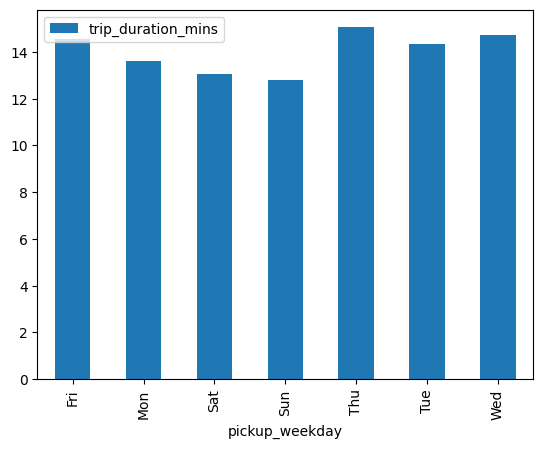

In [63]:
#average trip duration on each weekday
trip_data.groupby('pickup_weekday').agg({'trip_duration_mins':'mean'}).plot(kind='bar')

In terms of effect of weekday on the trip it looks like we havce higher number of trips from thu to Sat as compare to other days and trip duration seems to be not much more relative to weekday

Effect of Hour of day on the Trip 

<Axes: xlabel='pickup_hour', ylabel='count'>

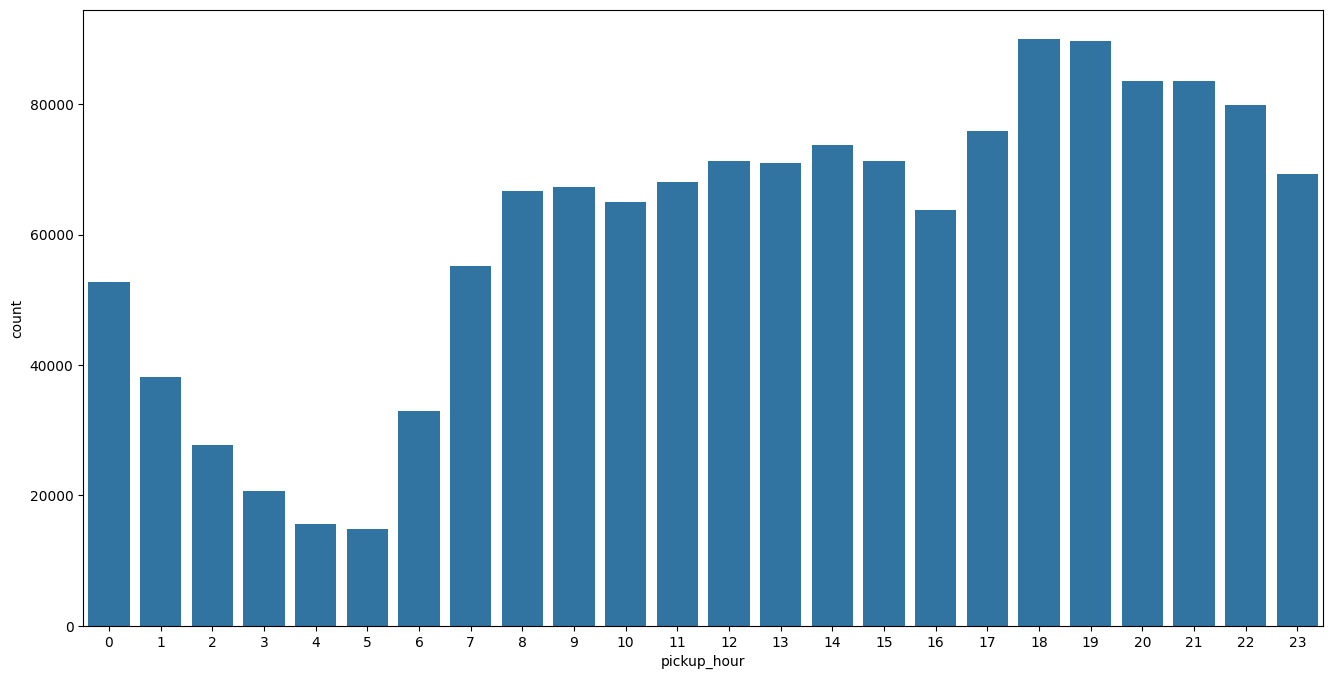

In [67]:
#plot to get the count of rides for each hour of the day 
fig = plt.figure(figsize=(16,8))
sns.countplot(trip_data , x = 'pickup_hour')

18 and 19 are the rush hours of the day and 20 to 23 follows them and as expected we have very few trips overnight 
In morning rush hours begins from nearly 8 thats around a office time

<Axes: xlabel='pickup_hour', ylabel='trip_duration_mins'>

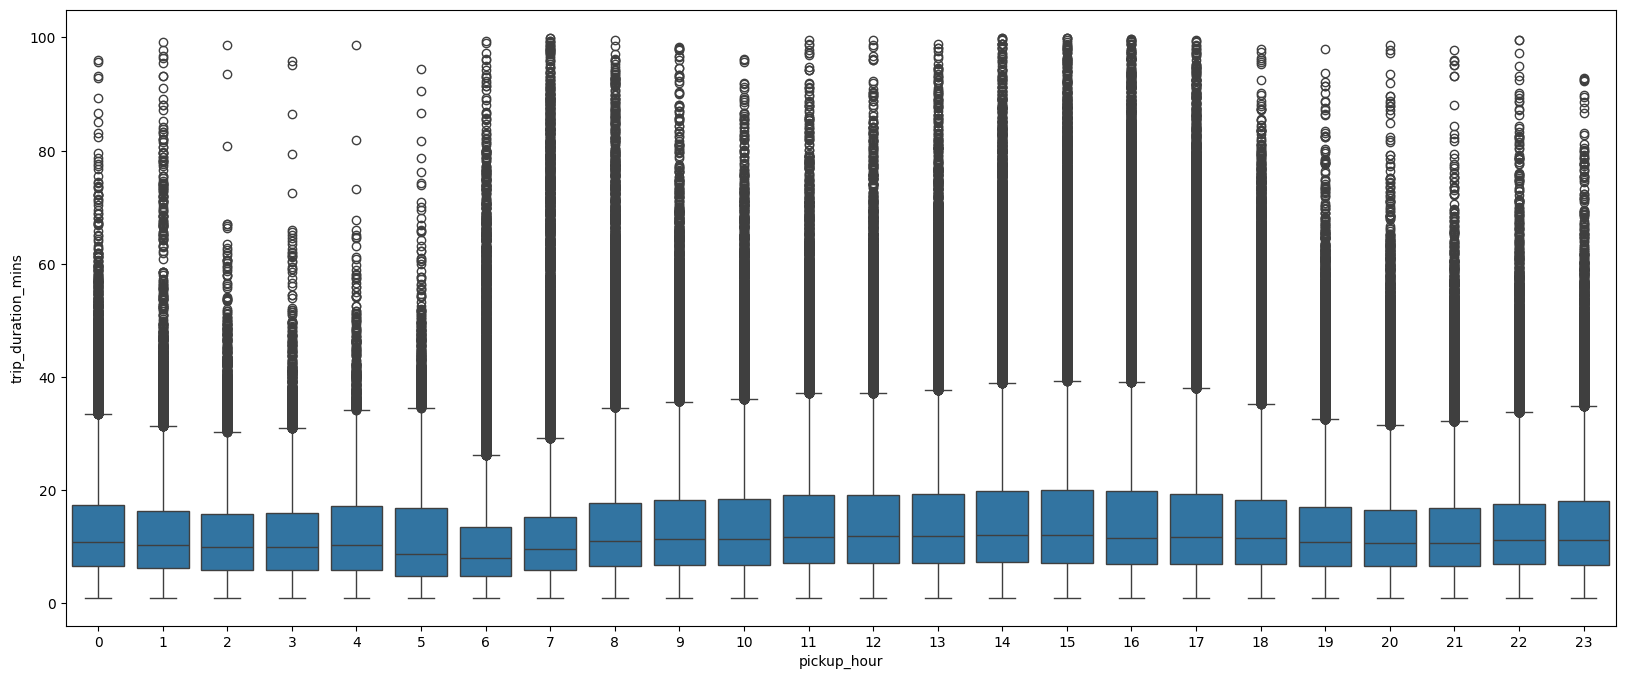

In [68]:
#boxplot to visualise trip duration around different hours of the day 
fig = plt.figure(figsize=(20,8))
sns.boxplot(trip_data[trip_data.trip_duration_mins<=100] , x = 'pickup_hour', y ='trip_duration_mins')

Although we don't get a very clear picture but overall it looks like that the trip duration overnight and early morning is bit less whereas it goes higher in the working hours of day from 08-19 hours around. We will try to divide the day into four different phases and visualize its effect 

In [69]:
#function to categorise an hour of pick up time into one of the fouir categories of different phases of the day 
def trip_dayphase(x):
    if x >=0 and x < 6:
        return 'overnight'
    if x>=6 and x<=12:
        return 'morning'
    if x>12 and x<=17:
        return 'afternoon'
    else:
        return 'evening'

In [70]:
#applying trip day phase function
trip_data['day_phase'] = trip_data['pickup_hour'].apply(lambda x: trip_dayphase(x))

<Axes: xlabel='day_phase', ylabel='trip_duration_mins'>

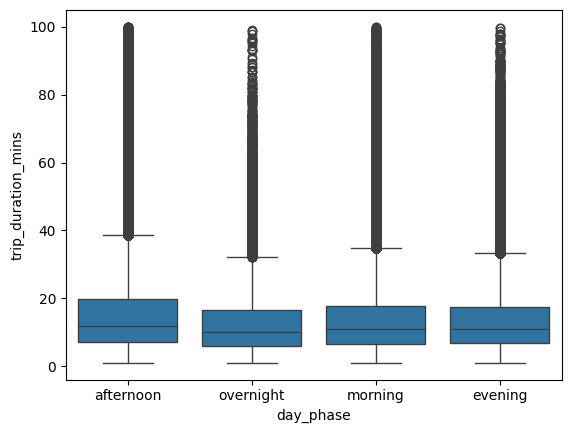

In [71]:
#boxplot between trip duration and day phase
sns.boxplot(trip_data[trip_data.trip_duration_mins<=100], x = 'day_phase', y = 'trip_duration_mins')

<Axes: xlabel='pickup_hour'>

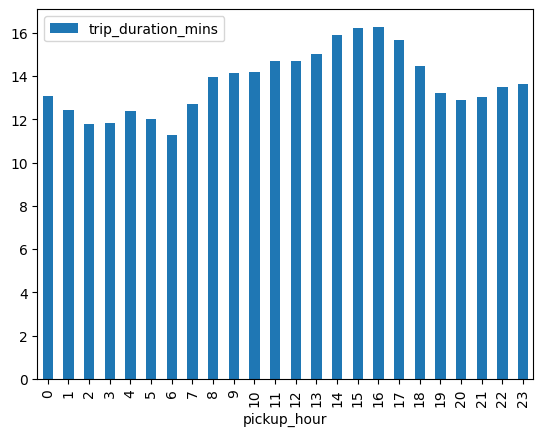

In [72]:
#average trip duration on each weekday
trip_data.groupby('pickup_hour').agg({'trip_duration_mins':'mean'}).plot(kind='bar')

Afternoon trip duration (i.e. from 12-17) seems to be higer, then the morning and evening ones


Monthly analysis on trip duration 

<Axes: xlabel='pickup_month', ylabel='count'>

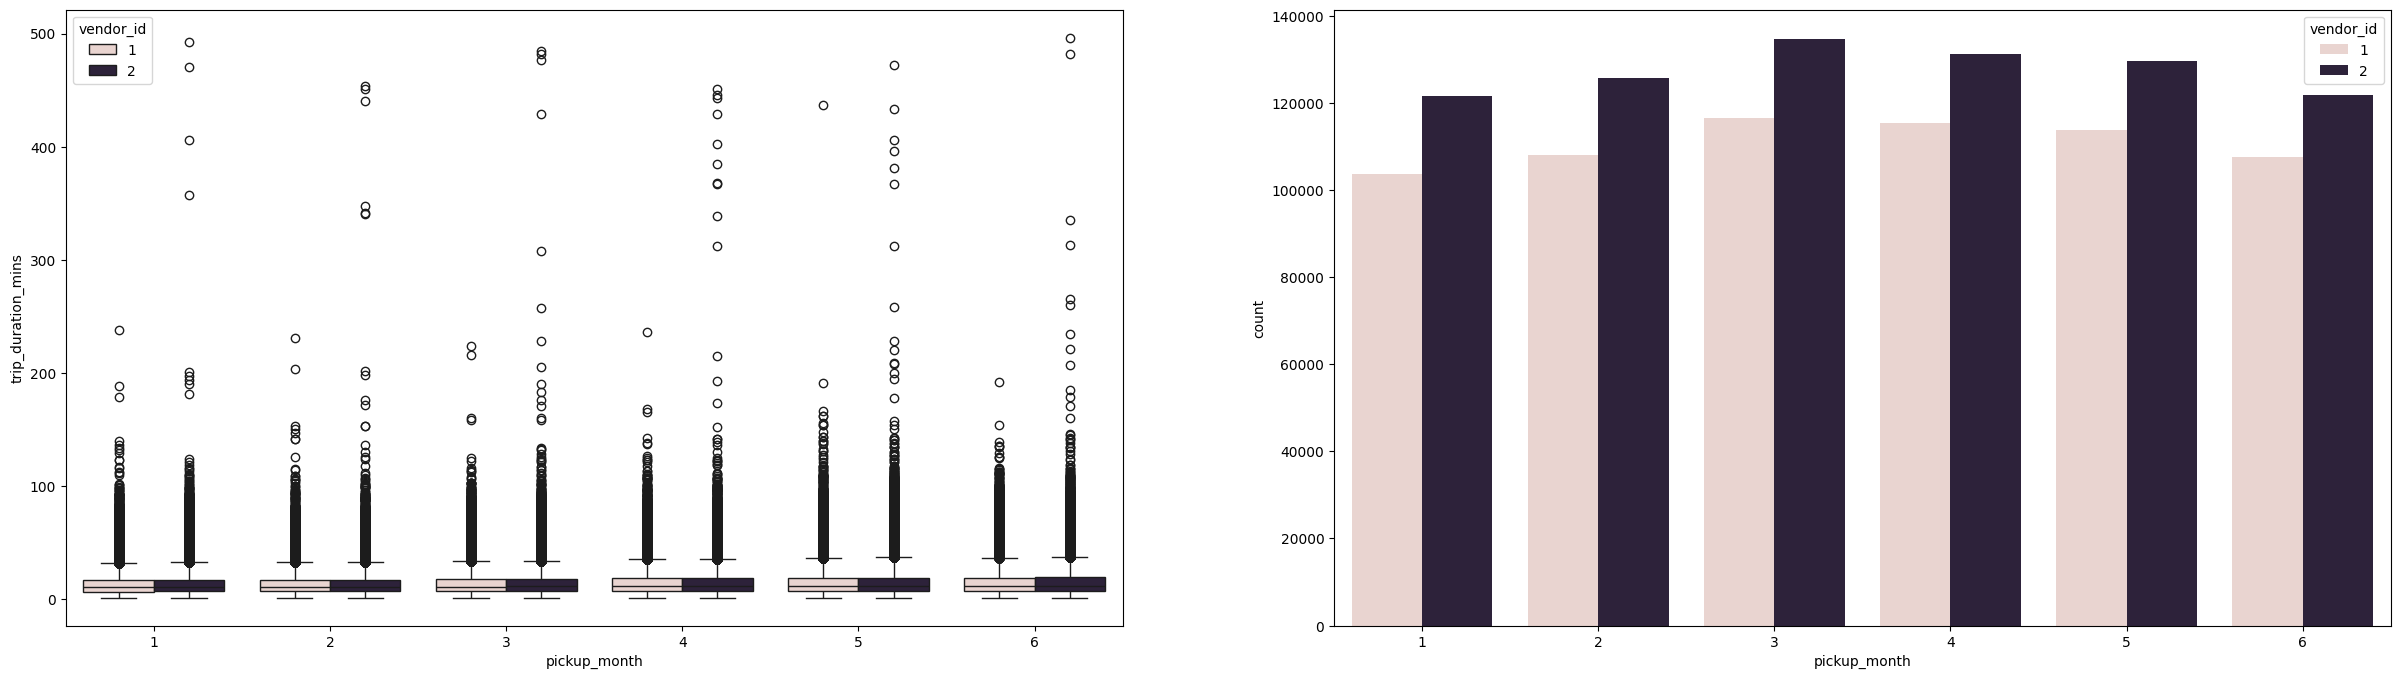

In [91]:
#plot to get the count of rides on each weekday by each vendor and their trip duration
fig, axs = plt.subplots(1,2, figsize=(30,8))
sns.boxplot(trip_data, x = 'pickup_month',  y = 'trip_duration_mins',hue = 'vendor_id', ax=axs[0])
sns.countplot(trip_data, x = 'pickup_month', hue = 'vendor_id',ax = axs[1])

Not much differentiation in terms of months but we can see there are bit surge in number of rides in 3rd and 4th month

<Axes: xlabel='pickup_month', ylabel='count'>

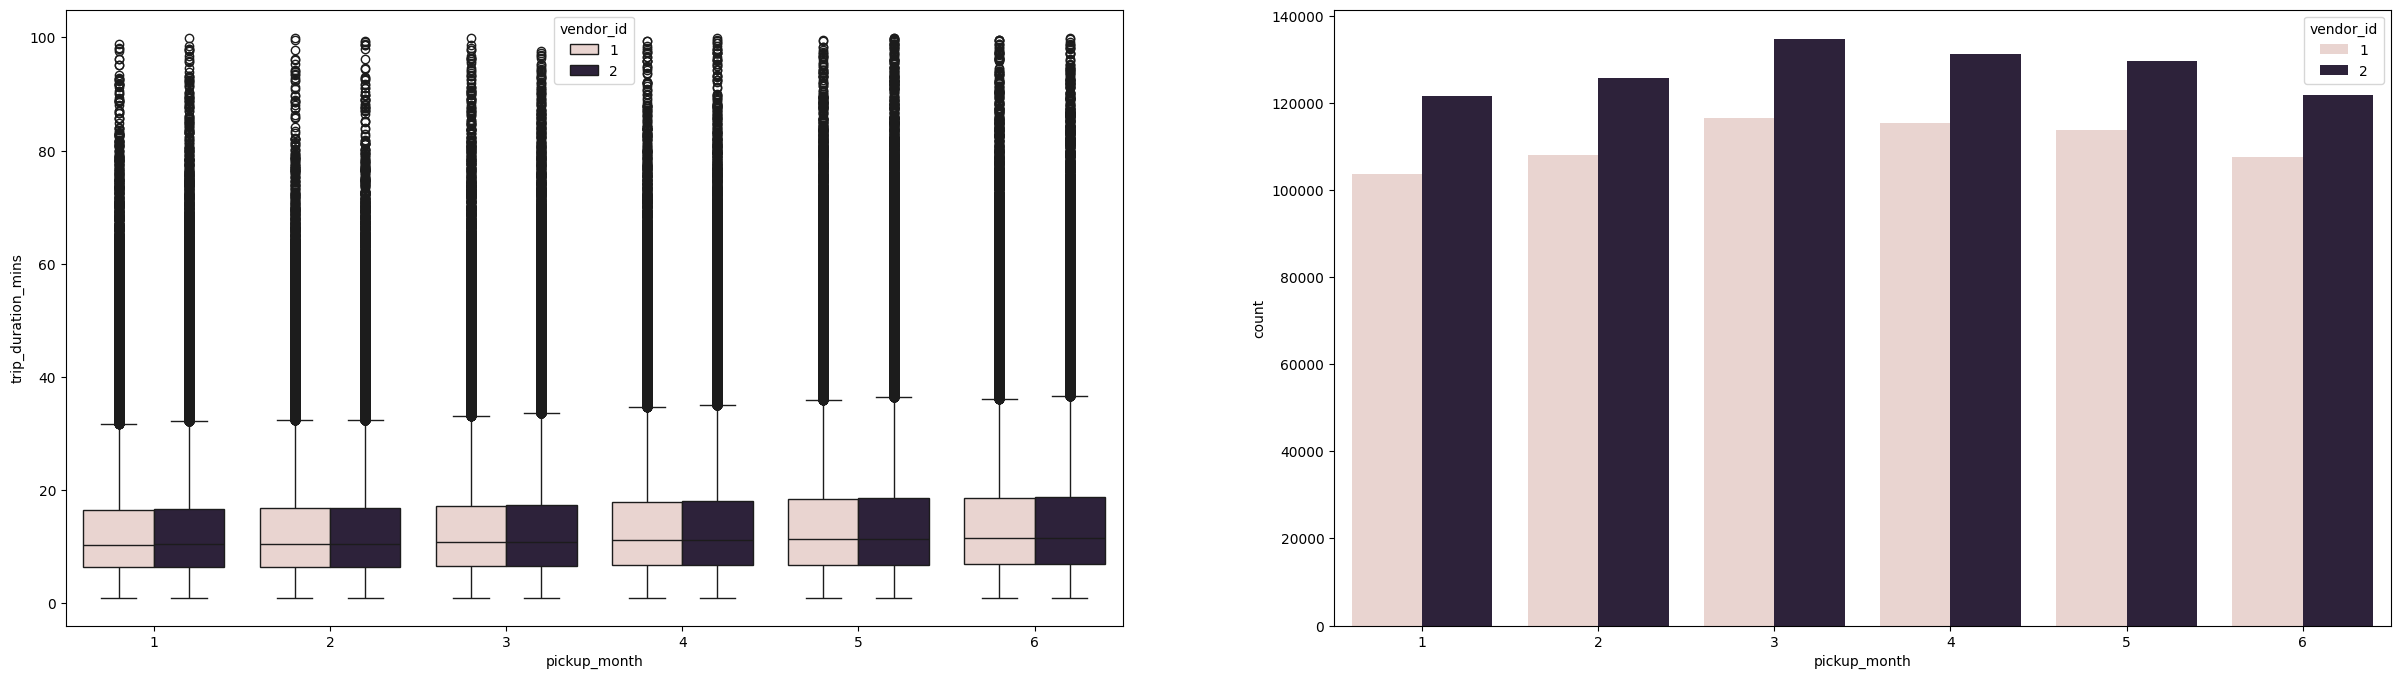

In [92]:
#removing all the trip duration with more than 100 minutes to get a better picture of effect of month
fig, axs = plt.subplots(1,2, figsize=(30,8))
sns.boxplot(trip_data[trip_data.trip_duration_mins<=100], x = 'pickup_month',  y = 'trip_duration_mins',hue = 'vendor_id', ax=axs[0])
sns.countplot(trip_data[trip_data.trip_duration_mins<=100], x = 'pickup_month', hue = 'vendor_id',ax = axs[1])

Again a similar result we can see that month does not effects much on trip duration.

Pick up position analysis

In [93]:
#chipping off the by far latitude and longitude data and keeping relevants proper latitude and longitude on data 
trip_data = trip_data.loc[(trip_data['pickup_latitude'] >= 40.637044) & (trip_data['pickup_latitude'] <= 40.855256)]
trip_data = trip_data.loc[(trip_data['pickup_longitude'] >= -74.035735) & (trip_data['pickup_longitude'] <= -73.770272)]
trip_data = trip_data.loc[(trip_data['dropoff_latitude'] >= 40.637044) & (trip_data['dropoff_latitude'] <= 40.855256)]
trip_data = trip_data.loc[(trip_data['dropoff_longitude'] >= -74.035735) & (trip_data['dropoff_longitude'] <= -73.770272)]
trip_data.shape

(1429848, 20)

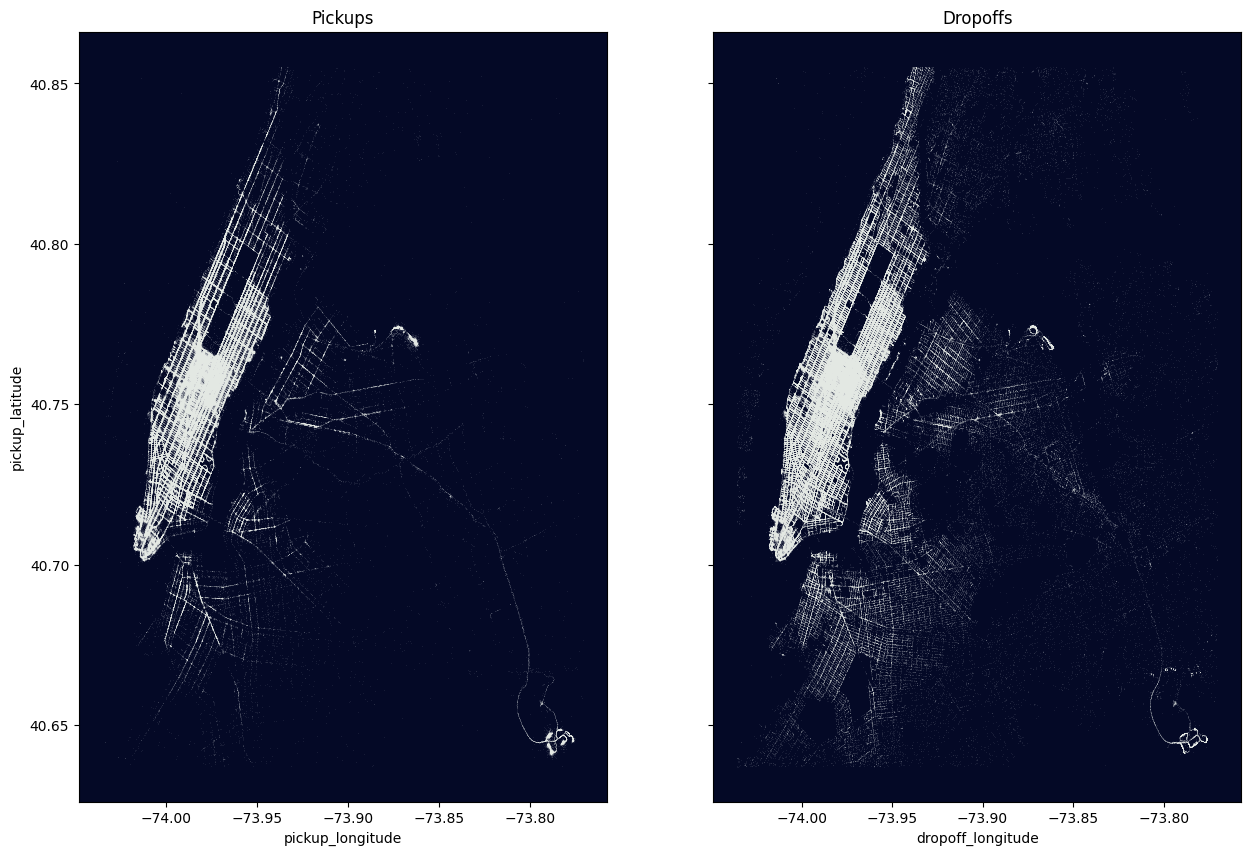

In [74]:
# analysing geopolitical data for pickups and dropoff

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

sns.scatterplot(data=trip_data,x='pickup_longitude', y='pickup_latitude',color='#F2F7F2', ax=ax1,s=.07, alpha=.6)
ax1.set_title("Pickups")
ax1.set_facecolor('#040926')

sns.scatterplot(data=trip_data,x='dropoff_longitude', y='dropoff_latitude',color='#F2F7F2', ax=ax2,s=.07, alpha=.6)
ax2.set_title("Dropoffs")
ax2.set_facecolor('#040926')
plt.show()

Most of the pick up and dropoff are in Manhattan so at peak time duration of ride will be bit high in Manhattan.

It will be difficult for a model to understand the values of latitude and longitude directly so we will group the location into 5 different clusters 

In [77]:
#building a kmeans cluster and clustering both pickup and dropoff into 5 different clusters
pickup_coordinates = trip_data[['pickup_latitude','pickup_longitude']]
dropoff_coordinates = trip_data[['dropoff_latitude','dropoff_longitude']]

n_clusters = 5

#clustering and labelling on pick up data 
pickup_kmeans = KMeans(n_clusters=n_clusters,random_state=42)
trip_data['pickup_cluster_label'] = pickup_kmeans.fit_predict(pickup_coordinates)

#clustering and labelling on dropoff data
dropoff_kmeans = KMeans(n_clusters=n_clusters,random_state=42)
trip_data['dropoff_cluster_label'] = dropoff_kmeans.fit_predict(dropoff_coordinates)

c:\Anaconda\envs\iris\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\envs\iris\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Anaconda\envs\iris\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


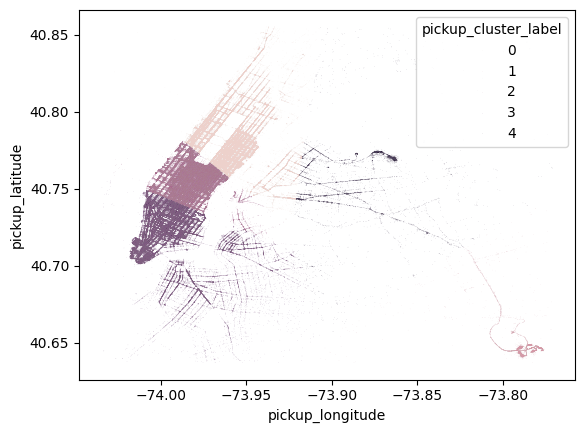

In [95]:
#visualising the pick up clusters on geomap
palatte = ["blue","red","green","black","brown"]
palette = sns.color_palette(palatte, as_cmap=True)

sns.scatterplot(data=trip_data,x='pickup_longitude',y='pickup_latitude', hue='pickup_cluster_label',s=.07, alpha=.6,palette=palatte)
plt.show()


c:\Anaconda\envs\iris\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


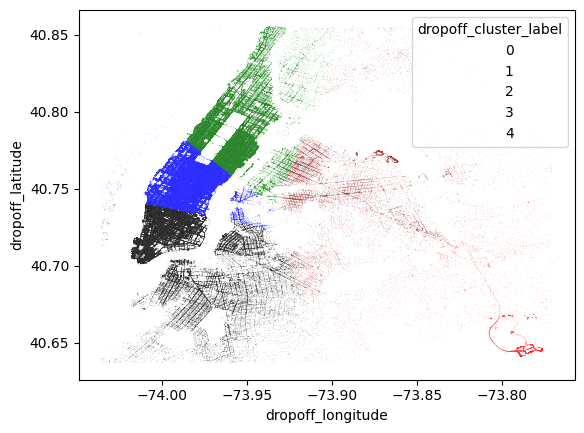

In [96]:
#visualising the drop off clusters on geomap
sns.scatterplot(data=trip_data,x='dropoff_longitude',y='dropoff_latitude',hue='dropoff_cluster_label',s=.07, alpha=.6,palette=palatte)
plt.show()

<BarContainer object of 5 artists>

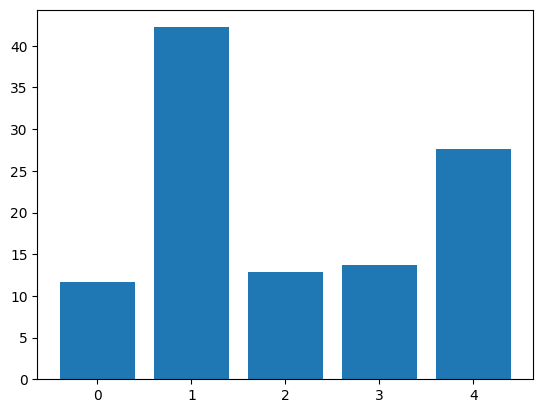

In [89]:
average_pickup_time = trip_data.groupby('pickup_cluster_label')['trip_duration_mins'].mean()
plt.bar(average_pickup_time.index,average_pickup_time.values)

<BarContainer object of 5 artists>

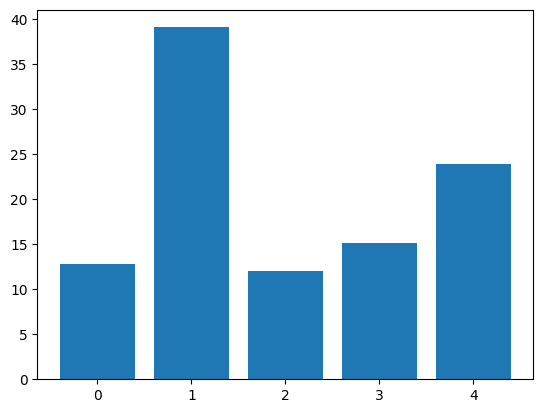

In [90]:
average_dropoff_time = trip_data.groupby('dropoff_cluster_label')['trip_duration_mins'].mean()
plt.bar(average_dropoff_time.index,average_dropoff_time.values)

Calculating distance for trips between pick up and drop off location

In [81]:
#function to calculate distance from latitude and longitude using haversine
def distance_calculator(x):
    loc1 = (x['pickup_latitude'], x['pickup_longitude'])
    loc2 = (x['dropoff_latitude'], x['dropoff_longitude'])
    distance = hs.haversine(loc1,loc2, unit = Unit.METERS)
    return distance

In [82]:
#applying a distance function
trip_data['trip_distance'] = trip_data.apply(lambda x:distance_calculator(x), axis=1)

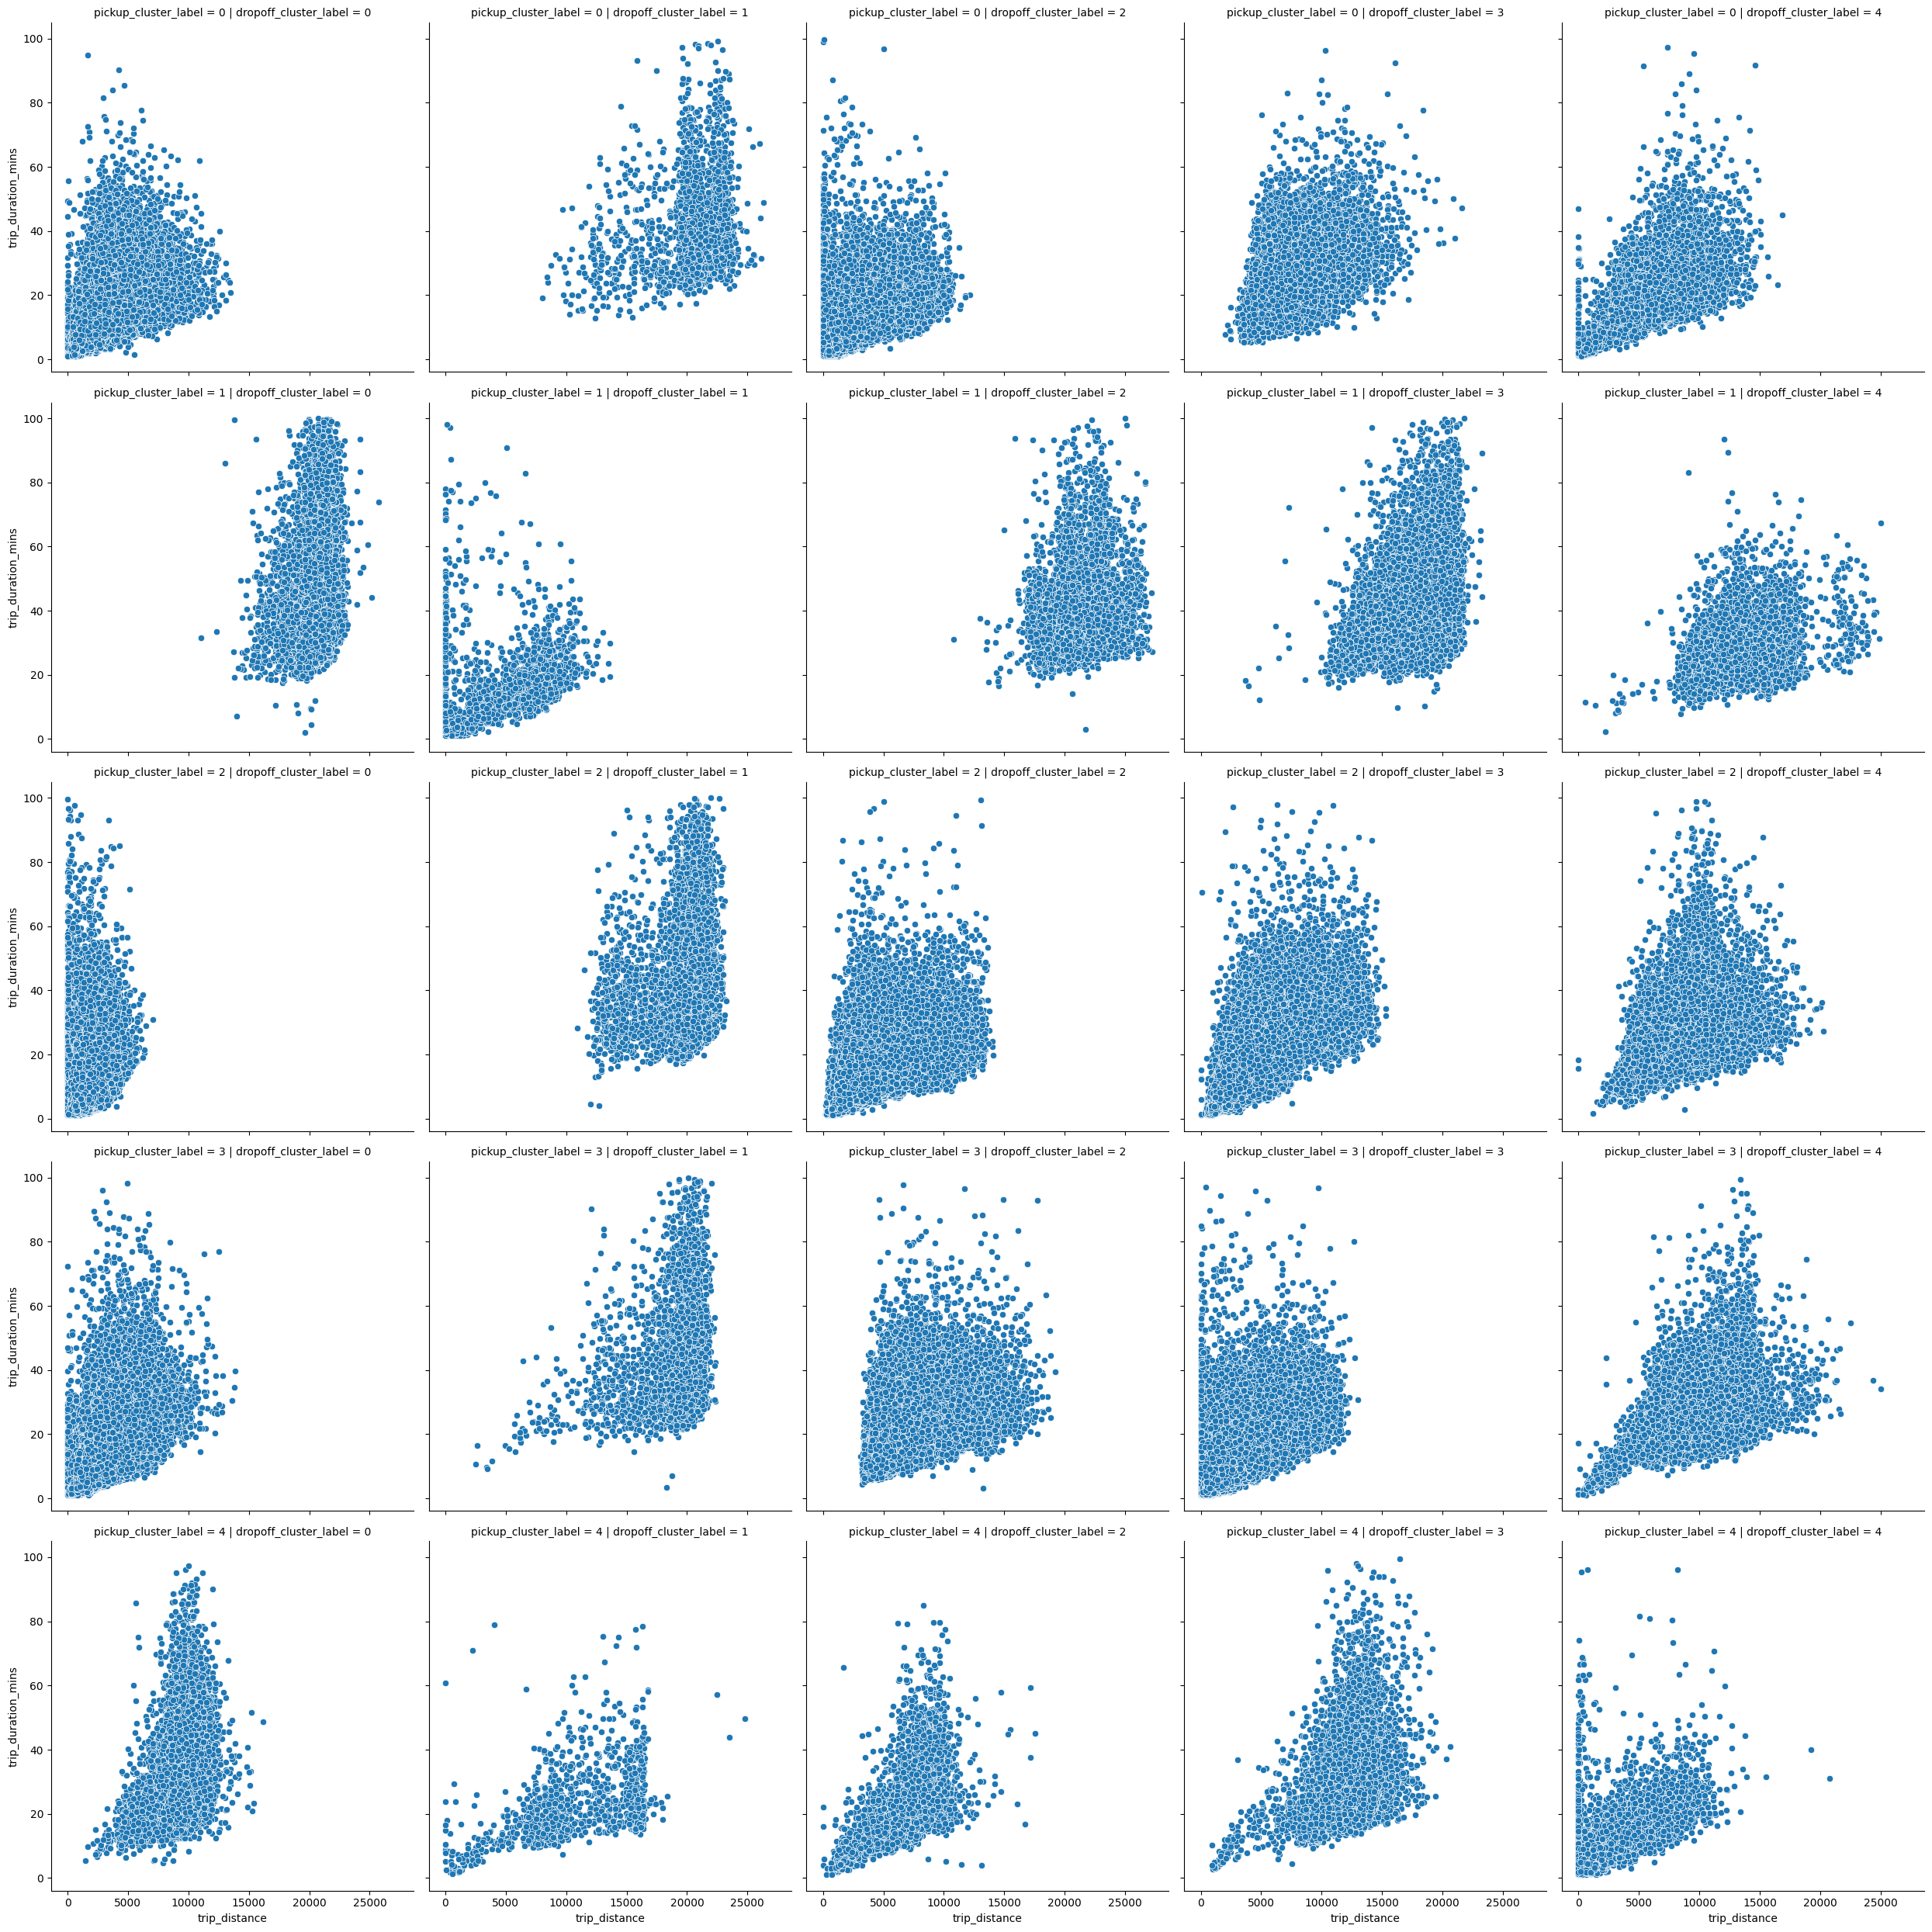

In [84]:
#checking the relatiob between trip duration and trip distance anong differet combination of pickup abd dropoff clusters
sns.relplot(data = trip_data[trip_data.trip_duration_mins<=100], x = 'trip_distance', y= 'trip_duration_mins', row = 'pickup_cluster_label',col = 'dropoff_cluster_label')

Note that pickup cluster one is not aligned with drop off cluster 1 tese both cluster 1 are different and clustering the location seems to be helpful in identifying the duration. For eg for pick up cluster 1 and drop off cluster 0 the distance seems to be high and so do the trip duration so for the rides with these pick up and drop off we can say that duration will be bit high  

We are done with a thorough analysis on the data and understood the data in terms of model prespective such as features like trip distance, location cluster of pick up and drop off location, weekday, hour of trip will be the useful features for model whereas features such as month,year and few other features seems to be not much of the use to the model 
